<a href="https://colab.research.google.com/github/nunososorio/SingleCellGenomics2024/blob/main/3_Wednesday_April10th/SessionIV_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# April 10th, Wednesday
## Practical Session IV - Part 2


## 0. Setup the environment and load your data

In [1]:
# Install scanpy and loompy if you don't have them already or if you are running on colab
! pip install scanpy loompy > _

In [2]:
# Load the libraries we will use
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/usr/local/lib/python3.10/dist-packages/loompy/bus_file.py:1

In [3]:
# Adjust the output for the figures
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 16
sc.logging.print_header()

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.25.2 scipy==1.11.4 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.1 pynndescent==0.5.11


In [26]:
adata = sc.read_h5ad("Data1_Norm.h5ad") # enter loom/h5ad file name here
#adata = sc.read_loom("Data1_Norm.loom", var_names='var_names', obs_names='obs_names') # if you load from a loom file, specify the name for the indices of var and obs

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## 3. Feature selection

Now, we begin with dimensionality reduction, i.e. reducing the number of variables in the data by removing features (genes) with little variability among the cells and by combining highly similar features. This is important because normally you start with tens of thousands of genes and it is difficult to represent their patterns in a two-dimensional visualization.

One useful (but optional) step is to perform cell cycle characterization, as the cell cycle signature is often a strong convoluting factor with cell type signatures.

### **Exercise 1**:

Perform cell cycle characterization on your dataset. Plot a scatter plot of the S_score and G2M_score metadata created and stored in your AnnData object. Color the points by the assigned cell cycle phase. What percentage of your cells are in a proliferative state (S or G2M phases)?

In [28]:
# your code here
S_genes_mouse = ['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung',
       'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Cenpu',
       'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76',
       'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2',
       'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8ap2',
       'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']
G2M_genes_mouse = ['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a',
       'Ndc80', 'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf',
       'Tacc3', 'Pimreg', 'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb',
       'Bub1', 'Kif11', 'Anp32e', 'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp',
       'Cdca3', 'Jpt1', 'Cdc20', 'Ttk', 'Cdc25c', 'Kif2c', 'Rangap1',
       'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8', 'Ect2', 'Kif23', 'Hmmr',
       'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5', 'Cenpe', 'Ctcf', 'Nek2',
       'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']

sc.tl.score_genes_cell_cycle(adata, s_genes=S_genes_mouse, g2m_genes=G2M_genes_mouse)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    513 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [29]:
# See which new variables were created
adata.obs.head(3)

,n_counts,n_genes,obs_names,percent_mito,S_score,G2M_score,phase
obs_names,,,,,,,
10X81_1_ATTGATCAGGTTCA--10,4750.0,2469,10X81_1_ATTGATCAGGTTCA--10,0.048632,0.062914,-0.026700,S
10X55_5_GTAGGTCAACACAC--1,3528.0,1534,10X55_5_GTAGGTCAACACAC--1,0.031463,-0.030425,0.033823,G2M
10X20_2_TGAGCTGATTTGGG-1-5,1259.0,746,10X20_2_TGAGCTGATTTGGG-1-5,0.009531,0.018792,0.008619,S


In [30]:
n2c = {"G1":"red", "S":"green", "G2M":"blue"} # use to assign each cell a color based on phase in the scatter plot
adata.obs['phase_color']=adata.obs.phase.map(n2c) # use the map function to apply the n2c dictionary
adata.obs.head(3)

,n_counts,n_genes,obs_names,percent_mito,S_score,G2M_score,phase,phase_color
obs_names,,,,,,,,
10X81_1_ATTGATCAGGTTCA--10,4750.0,2469,10X81_1_ATTGATCAGGTTCA--10,0.048632,0.062914,-0.026700,S,green
10X55_5_GTAGGTCAACACAC--1,3528.0,1534,10X55_5_GTAGGTCAACACAC--1,0.031463,-0.030425,0.033823,G2M,blue
10X20_2_TGAGCTGATTTGGG-1-5,1259.0,746,10X20_2_TGAGCTGATTTGGG-1-5,0.009531,0.018792,0.008619,S,green


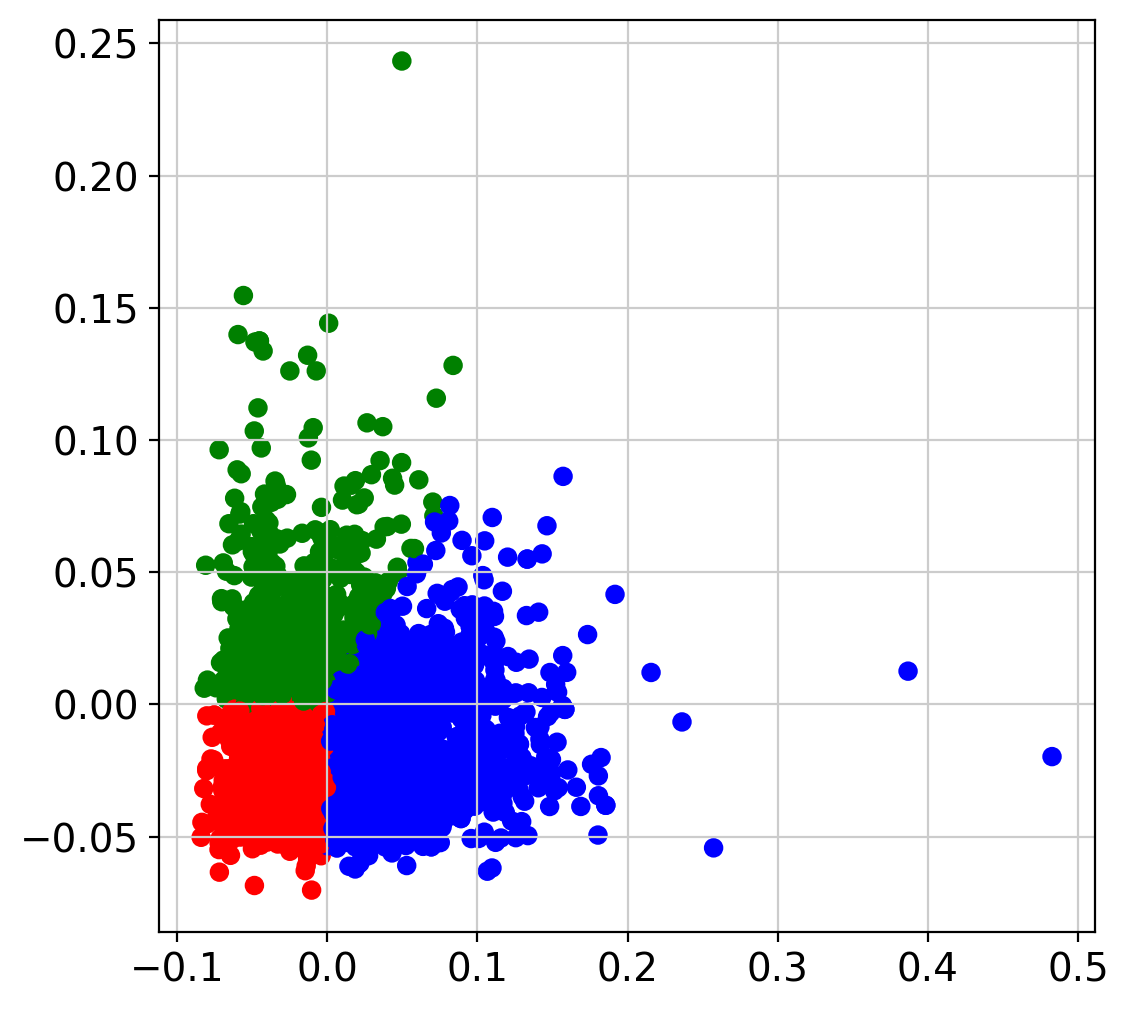

In [31]:
# your code here
# Plot the G2M and S score of each cell, color them by phase assigned by scanpy (use the color column we just created)
plt.scatter(x=adata.obs.G2M_score,y=adata.obs.S_score, c=adata.obs.phase_color) # your code here!
plt.show()

In [32]:
adata.obs["phase"].value_counts()

G2M    1655
G1     1007
S       779
Name: phase, dtype: int64

### **Exercise 2**:
Next, we want to select a subset (~1000-4000) of genes that are highly variable in the dataset. Genes that are highly or lowly expressed in all cells will not assist with discriminating different cell types from each other.

In [34]:
# suggestion: start with 2000 highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000, min_disp=0.5,
                            max_disp=np.inf, min_mean=0.0125, max_mean=3, span=0.3)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [35]:
# You could filter your data to keep ony the highly variable genes
# adata = adata[:, adata.var["highly_variable"]].copy() # actually do the filtering

In [36]:
adata

AnnData object with n_obs × n_vars = 3441 × 11899
    obs: 'n_counts', 'n_genes', 'obs_names', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'phase_color'
    var: 'n_cells', 'var_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

### **Exercise 3:**

While correcting for technical covariates may be crucial to uncovering the underlying biological signal, correction for biological covariates serves to single out particular biological signals of interest. The most common biological data correction is to remove the effects of the cell cycle on the transcriptome, the number of raw counts that existed per cell, or the percentage of mitochondrial reads present. This data correction can be performed by a simple linear regression against a cell cycle score as implemented in scanpy.

In [38]:
# your code here
sc.pp.regress_out(adata, 'phase') # specify which feature from adata.obs you want to regress out, if any

regressing out phase
    finished (0:01:37)


## 4. Principal component analysis

Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset. One of the simplest forms of dimensionality reduction is PCA. Principal component analysis (PCA) is a mathematical procedure that transforms a number of possibly correlated (e.g., expression of genes in a network) variables into a (smaller) number of uncorrelated variables called principal components ("PCs").

In [39]:
# Do PCA
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [40]:
# Results are stored in the .uns layer of the anndata
adata

AnnData object with n_obs × n_vars = 3441 × 11899
    obs: 'n_counts', 'n_genes', 'obs_names', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'phase_color'
    var: 'n_cells', 'var_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### **Exercise 4**:
Visualize the first PCs, color by cell cycle phase and n_counts (unnormalized)


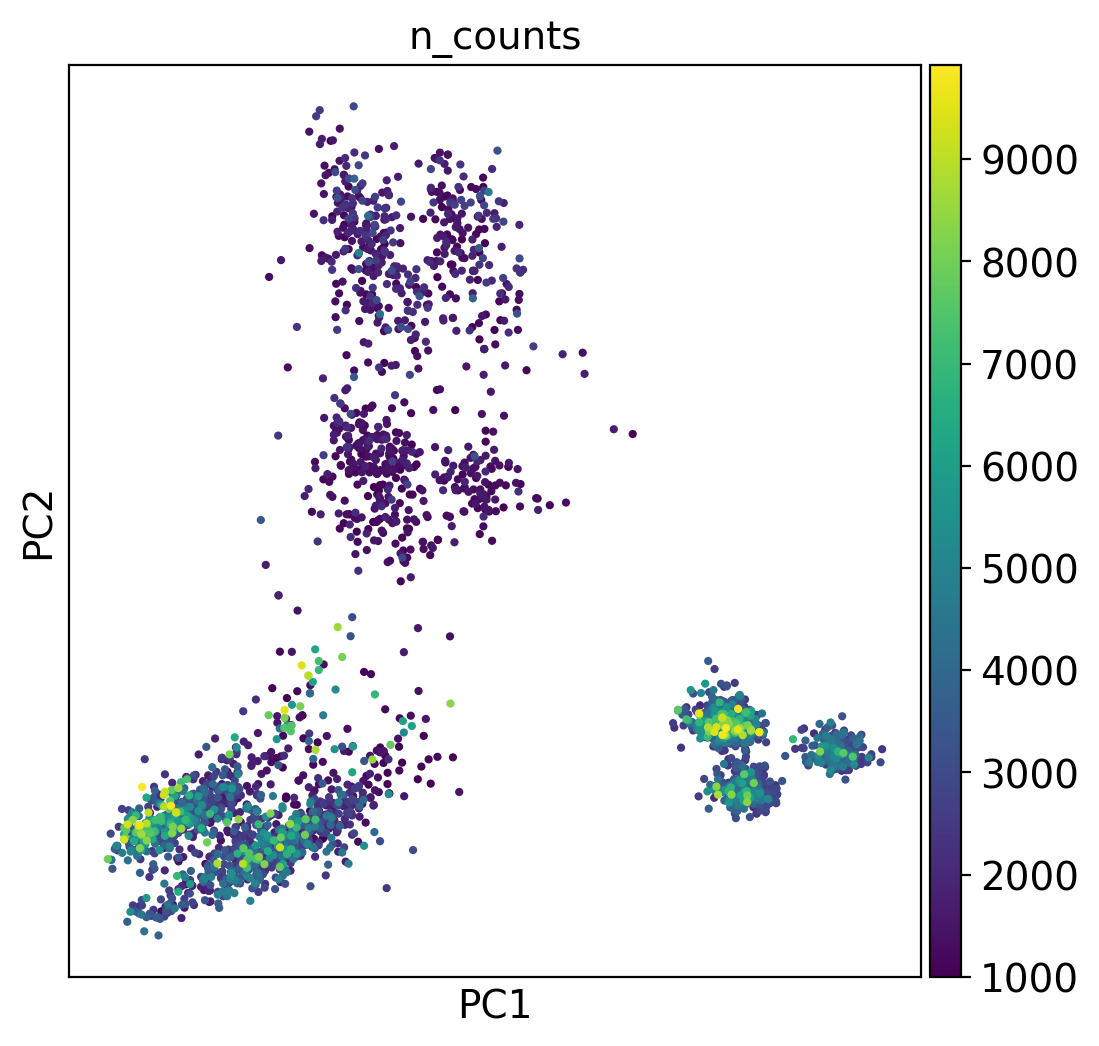

In [48]:
# your code here
sc.pl.pca(adata, color='n_counts') # specify the phase, n_counts as colors based on the adata.obs metadata naming scheme

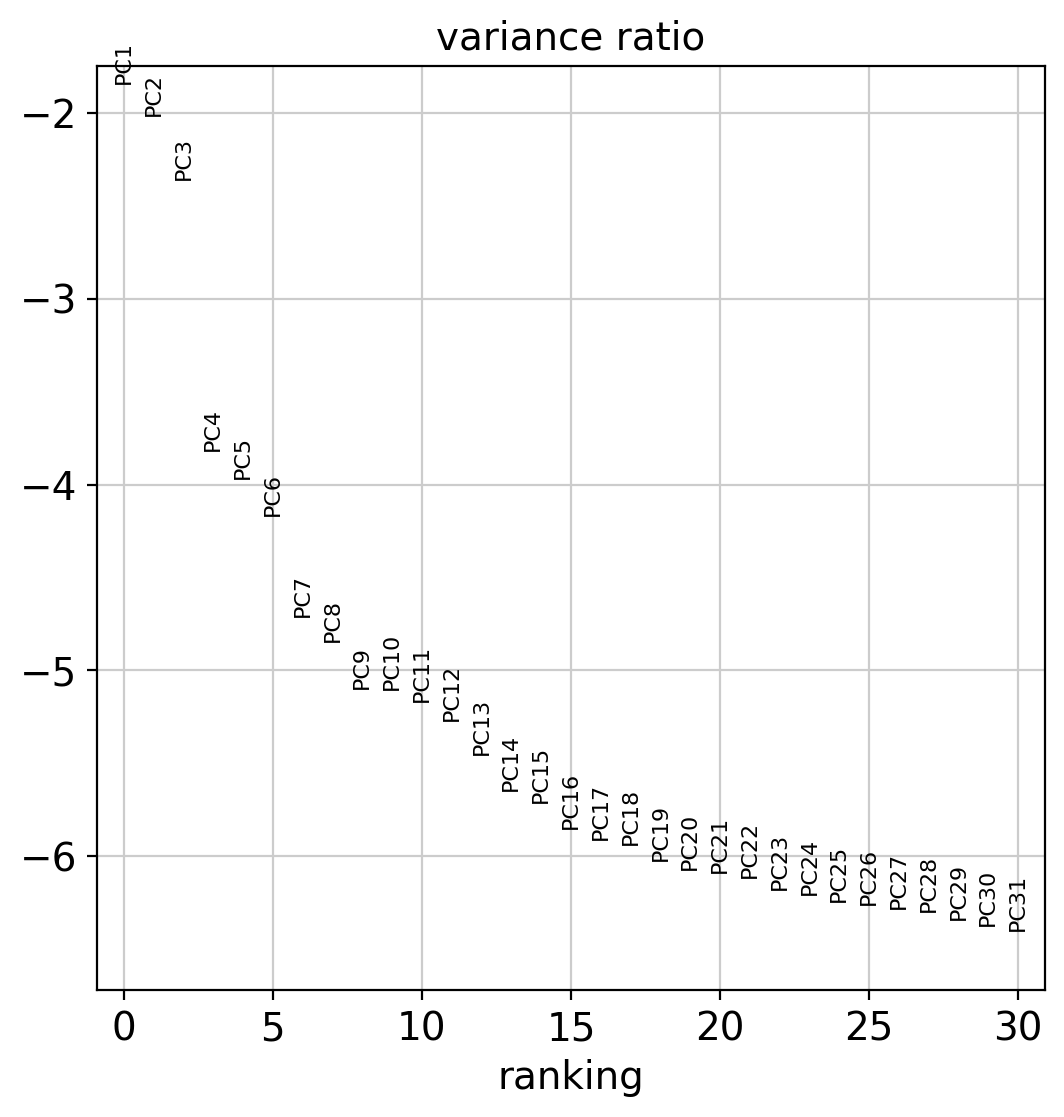

In [42]:
sc.pl.pca_variance_ratio(adata, log=True) # see contribution of each PC to variance

## 5. Dimensionality reduction

Compute the neighborhood graph of cells using the PCA representation of the data matrix. The purpose of this step is to understand the “distance” between individual cells in the lower-dimensional PCA space, important for creating 2D scatter plot representations of your data. The number of neighbors used will influence how much the data is smoothened, which is a necessary step due to the sparsity (missing values) widely present in scRNA-seq data compared to bulk methods.


In [51]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # specify the number of neighbors and number of PCs you wish to use

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


Embedding the graph in a 2D representation can be performed using either tSNE or UMAP algorithms.

### **Exercise 5**:

Run tSNE and UMAP algorithms on your data after completing the previous steps with default parameters. We will evaluate the quality of each approach in later exercises.


In [52]:
sc.tl.tsne(adata, random_state=0)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:35)


In [53]:
sc.tl.umap(adata, alpha=0.3, min_dist=0.5, random_state=0)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


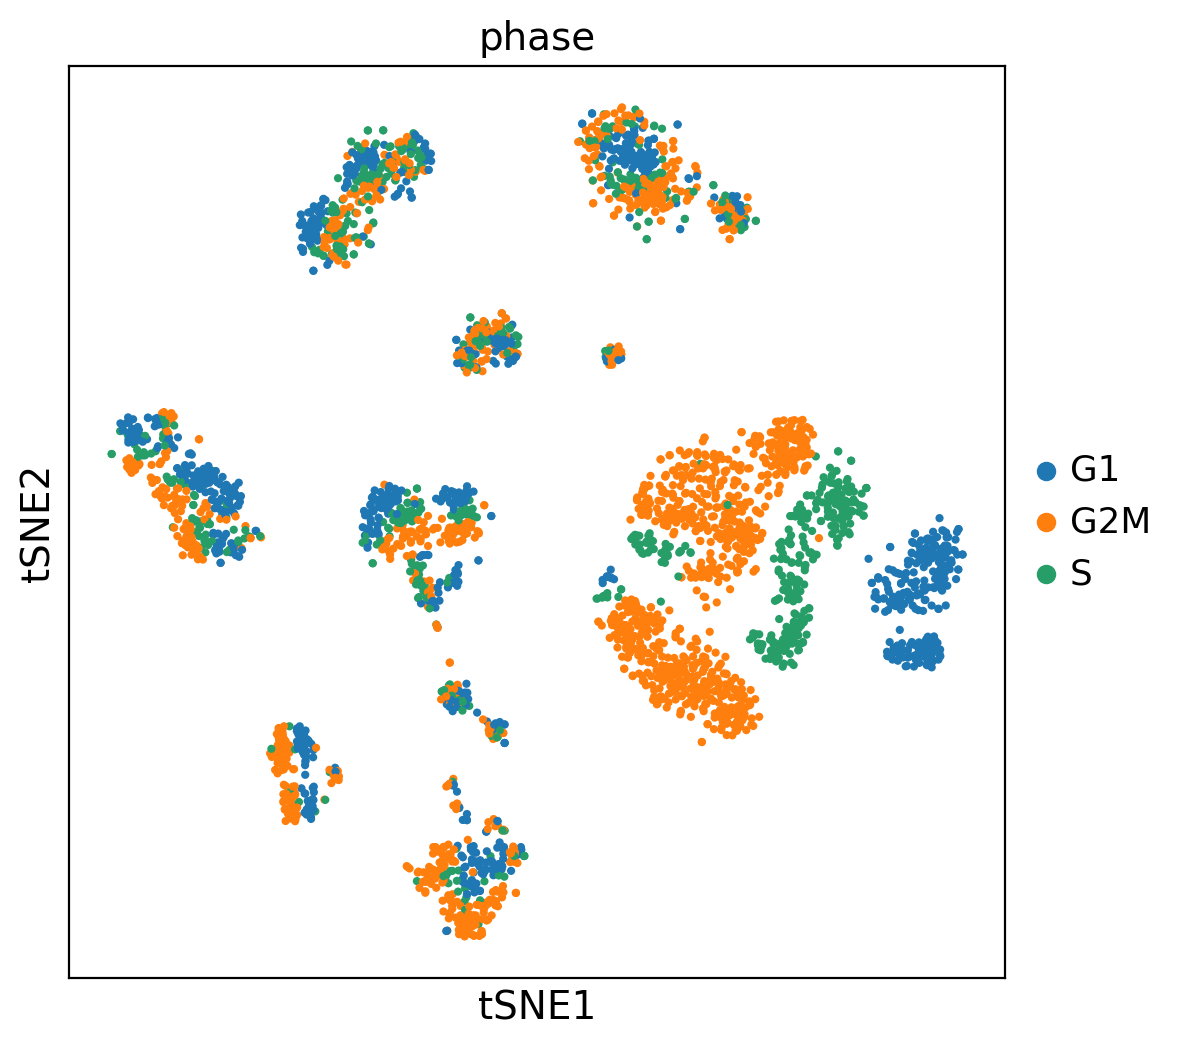

In [54]:
# visualize the tSNE colored by phase
sc.pl.tsne(adata, use_raw=False, color='phase', wspace=0.3, ncols=3)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


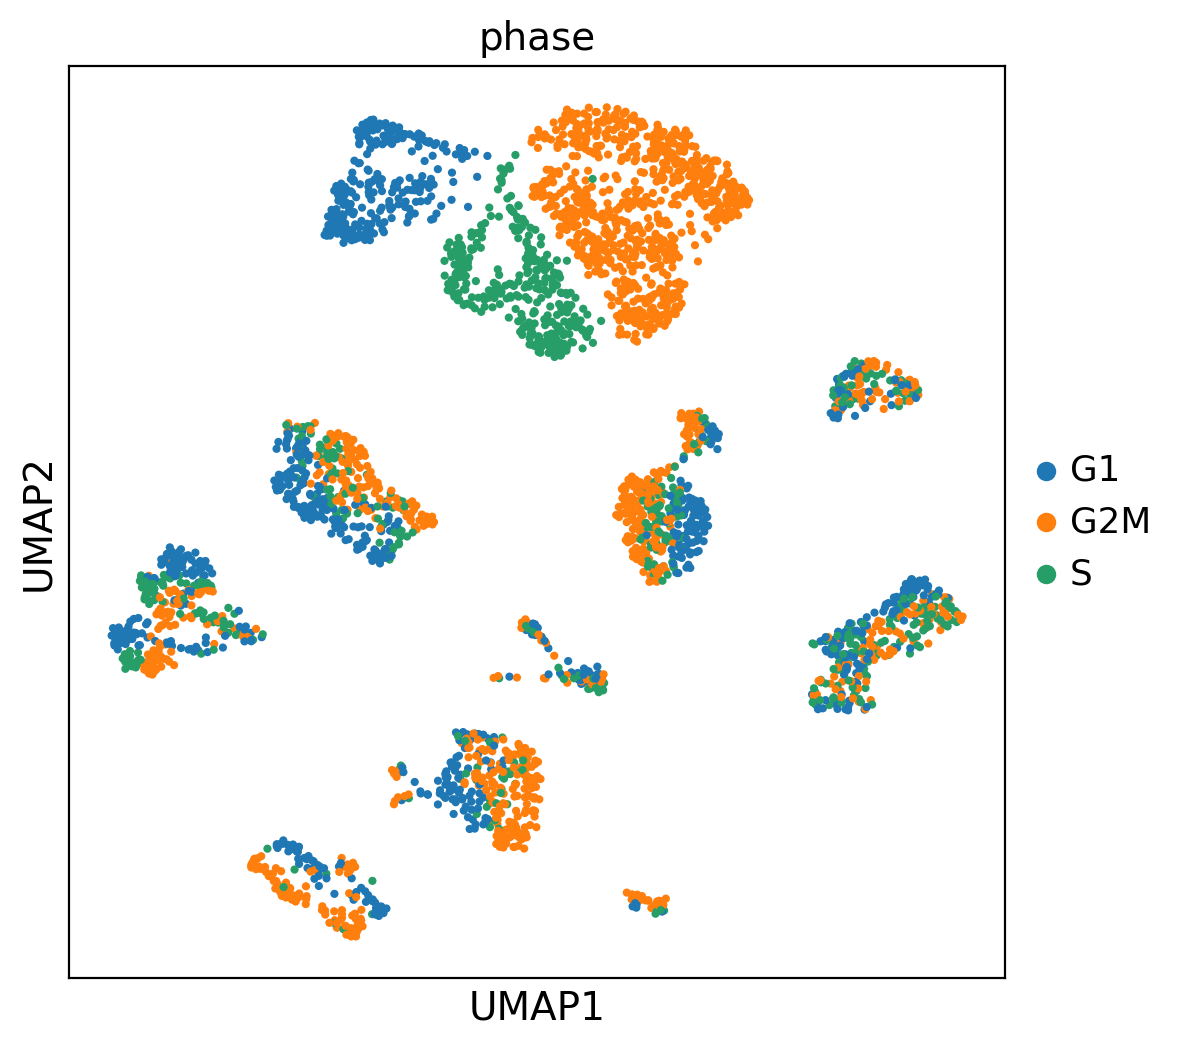

In [55]:
# visualize the UMAP colored by phase
sc.pl.umap(adata, use_raw=False, color='phase', wspace=0.3, ncols=3)

### **Exercise 6**:

Now save your data again.

If you use .loom format, this time you *must* use the option *write_obsm_varm=True* to store .obsm and .varm layers in the loom file.

Note that the .uns layer will not be saved in .loom, so you will have to recalculate the neighbors later on!

In [57]:
adata

AnnData object with n_obs × n_vars = 3441 × 11899
    obs: 'n_counts', 'n_genes', 'obs_names', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'phase_color'
    var: 'n_cells', 'var_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'phase_colors', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [59]:
# Your code here
adata.write_h5ad('Data1_DimRed.h5ad') # Choose a filename to store your data

In [58]:
# Your code here
#adata.write_loom('Data1_DimRed.loom', write_obsm_varm=True) # Choose a filename to store your data